In [1]:
!pip install citipy

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests 
from config import weather_api_key
import time
from datetime import datetime
url = 'https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key 

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
coordinates = list(lat_lngs)

In [5]:
# create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we'll add it to the cities list
    if city not in cities:
        cities.append(city)
        
len(cities)

608

In [6]:
# create an empty list to hold the weather data
city_data = []

# print the beginning of the logging
print("Beginning data retrieval       ")
print("-------------------------------")

# create counters
record_count = 1
set_count = 1

for i, city in enumerate(cities):

    # group cities in sets of 50 for logging purposes
    if(i % 50 == 0 and i >= 50):
            set_count += 1
            record_count = 1
            time.sleep(60)

    # create an endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")

    # log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind= city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # append the city information into city_data list.
        city_weather_stats={"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date}
        city_data.append(city_weather_stats)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning data retrieval       
-------------------------------
Processing Record 1 of Set 1 | torbay
Processing Record 2 of Set 1 | khatanga
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | victoria
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | quatre cocos
Processing Record 8 of Set 1 | la ronge
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | wazzan
City not found. Skipping...
Processing Record 13 of Set 1 | tuktoyaktuk
Processing Record 14 of Set 1 | grindavik
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | ketchikan
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | xianshuigu
Processing Record 19 of Set 1 | mar del plata
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | jamestown
Proce

In [12]:
len(city_data)

556

In [13]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,37.27,91,100,20.71,CA,2022-04-13 18:14:46
1,Khatanga,71.9667,102.5000,14.79,95,100,9.62,RU,2022-04-13 18:14:46
2,Victoria,22.2855,114.1577,78.33,85,69,5.01,HK,2022-04-13 18:14:15
3,Ushuaia,-54.8000,-68.3000,56.86,62,40,20.71,AR,2022-04-13 18:09:49
4,Longyearbyen,78.2186,15.6401,19.24,79,40,5.75,SJ,2022-04-13 18:14:05


In [14]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Torbay,CA,2022-04-13 18:14:46,47.6666,-52.7314,37.27,91,100,20.71
1,Khatanga,RU,2022-04-13 18:14:46,71.9667,102.5000,14.79,95,100,9.62
2,Victoria,HK,2022-04-13 18:14:15,22.2855,114.1577,78.33,85,69,5.01
3,Ushuaia,AR,2022-04-13 18:09:49,-54.8000,-68.3000,56.86,62,40,20.71
4,Longyearbyen,SJ,2022-04-13 18:14:05,78.2186,15.6401,19.24,79,40,5.75
...,...,...,...,...,...,...,...,...,...
551,Gazanjyk,TM,2022-04-13 18:31:34,39.2446,55.5154,65.68,53,21,12.44
552,Skjervoy,NO,2022-04-13 18:31:34,70.0311,20.9714,33.80,87,72,4.70
553,Balkhash,KZ,2022-04-13 18:31:35,46.8440,74.9804,51.17,44,2,16.91
554,Andijon,UZ,2022-04-13 18:31:35,40.7821,72.3442,69.08,45,10,3.42


In [15]:
# create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# extract relevant fields from the dataframe for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

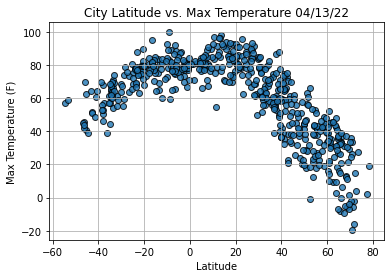

In [28]:
plt.scatter(lats,
            max_temps,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# save the figure
plt.savefig('weather_data/Fig1.png')

# show plot
plt.show()

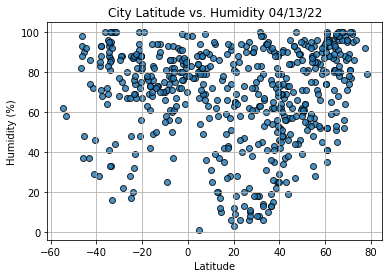

In [26]:
plt.scatter(lats,
            humidity,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# save the figure
plt.savefig('weather_data/Fig2.png')

# show plot
plt.show()

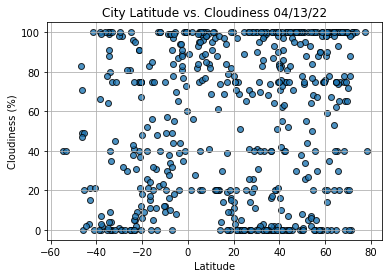

In [27]:
plt.scatter(lats,
            cloudiness,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# save the figure
plt.savefig('weather_data/Fig3.png')

# show plot
plt.show()

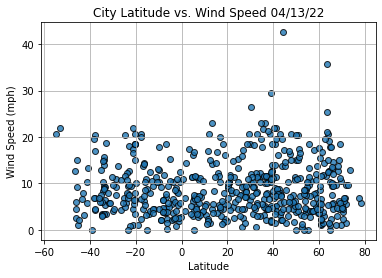

In [29]:
plt.scatter(lats,
            wind_speed,
            edgecolor='black', linewidths=1, marker='o',
            alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# save the figure
plt.savefig('weather_data/Fig4.png')

# show plot
plt.show()